In [1]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import AdamW
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomContrast(0.1),
])

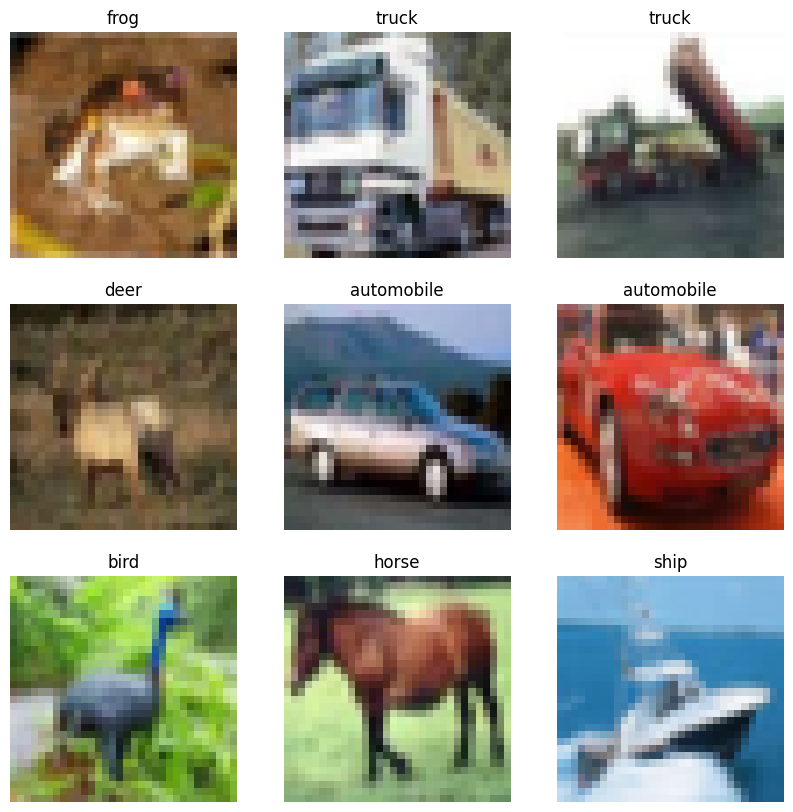

In [3]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [4]:
# Step 4: Build the CNN Model
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras import mixed_precision
import tensorflow as tf

# 啟用混合精度
mixed_precision.set_global_policy('mixed_float16')

# 用 Sequential 組成模型
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    data_augmentation,

    # Block 1
    layers.Conv2D(32, (1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Block 4
    layers.Conv2D(256, (1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Flatten + Dense
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 7,239,946 (27.62 MB)

 Trainable params: 7,236,298 (27.60 MB)

 Non-trainable params: 3,648 (14.25 KB)

In [5]:
# Step 5: Compile the Model
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              jit_compile=True  # 啟用 XLA 加速
              )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [6]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
# Step 6: Train the Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.7, patience=2, min_lr=1e-5
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',     # 監控驗證集的 loss
    patience=10,             # 沒有改善時等待 5 個 epoch
    restore_best_weights=True # 恢復最佳模型權重
)

history = model.fit(
    train_images, train_labels,
    batch_size=1024,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8395 - loss: 0.5231 - val_accuracy: 0.7973 - val_loss: 0.7260 - learning_rate: 1.0000e-05
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - accuracy: 0.8400 - loss: 0.5231 - val_accuracy: 0.7993 - val_loss: 0.7159 - learning_rate: 1.0000e-05
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - accuracy: 0.8404 - loss: 0.5235 - val_accuracy: 0.7973 - val_loss: 0.7176 - learning_rate: 1.0000e-05
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.8405 - loss: 0.5172 - val_accuracy: 0.7957 - val_loss: 0.7240 - learning_rate: 1.0000e-05
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - accuracy: 0.8404 - loss: 0.5153 - val_accuracy: 0.7956 - val_loss: 0.7281 - learning_rate: 1.0000e-05
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.8375 - loss: 0.5252 - val_accuracy: 0.7982 - val_loss: 0.7197 - learning_rate: 1.0000e-05
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/ste

In [13]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.8017 - loss: 0.7062

Test accuracy: 0.8017


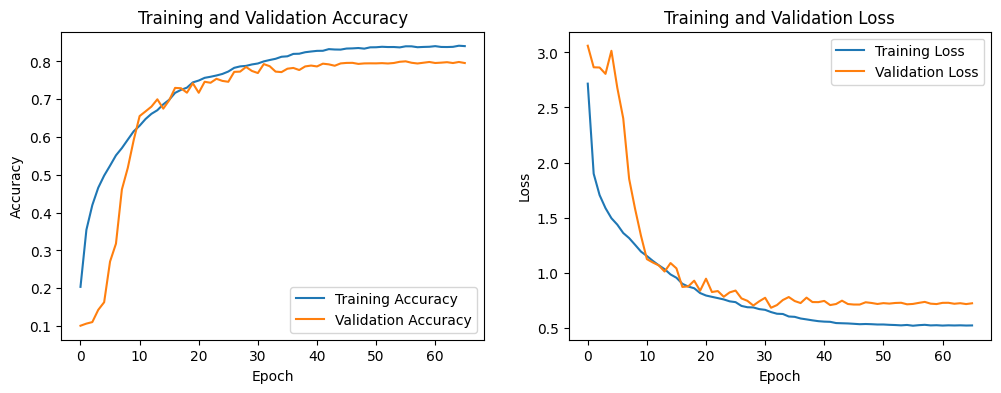

In [9]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


In [14]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8017
Test Loss: 0.7062
Final Training Accuracy: 0.8410
Final Validation Accuracy: 0.7988
Final Training Loss: 0.5148
Final Validation Loss: 0.7200
Training Epochs: 28
Model Parameters: 7239946


# Task5
1. 資料處理與資料增強
  - 水平翻轉（RandomFlip）
  - ±10% 旋轉（RandomRotation(0.1)）
  - ±10% 縮放（RandomZoom(0.1)）
  - ±10% 平移（RandomTranslation(0.1, 0.1)）
  - ±10% 對比度變換（RandomContrast(0.1)）

2. 模型架構
  - Input：32×32 彩色影像，前接資料增強層。

  - 卷積區塊（共四個 Block）：

    - 每個 Block 有三層卷積（1×1, 3×3, 5×5），每層後接 BatchNormalization()，再接 MaxPooling2D() 降維與 Dropout(0.25) 降低過擬合。

    - 通道數逐層提升（32 → 64 → 128 → 256），用以提取更深層特徵。

    - 全連接層：卷積後 Flatten()，接一個 Dense(256, relu) 與 BN+Dropout(0.5)，再接 Dense(128, relu) 與 BN+Dropout(0.5)。

    - 輸出層：最後用 Dense(10, softmax) 做為 10 類分類輸出。

    - 並對 Dense 層與卷積層加入 kernel_regularizer=l2(1e-4) 抑制過擬合。

3. 優化器與損失函數
  - 採用 AdamW(learning_rate=0.001, weight_decay=1e-4) 優化器，能在 Adam 動態學習率的基礎上增加權重衰減，提升泛化能力。

  - 損失函數為 sparse_categorical_crossentropy，適用於整數標籤。

  - 啟用 mixed_precision（混合精度）與 jit_compile=True（XLA 加速），以提高模型在 GPU 上的運算效率。

4. 訓練策略與 Callbacks
  - 使用 EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)，在驗證準確率長期未提升時提前終止訓練。
  - 使用 ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=2, min_lr=1e-5)，在驗證損失停滯時自動降低學習率。
  - batch_size 為 1024，最多訓練 100 epoch。



In [15]:
!pytest test_cnn.py -v -s

============================= test session starts =============================
platform win32 -- Python 3.12.10, pytest-8.4.1, pluggy-1.6.0 -- C:\Users\houpi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\houpi\Downloads
plugins: anyio-4.3.0, langsmith-0.3.13
collecting ... collected 6 items

test_cnn.py::test_file_name PASSED
test_cnn.py::test_task_1_model_changes PASSED
test_cnn.py::test_task_2_hyperparameters PASSED
test_cnn.py::test_task_3_data_augmentation PASSED
test_cnn.py::test_task_4_visualization PASSED
test_cnn.py::test_task_5_report Warning: Task 5: Report section not found, passing with reduced score
PASSED

============================== 6 passed in 0.13s ==============================
